<a href="https://colab.research.google.com/github/kmes055/github_tutorial/blob/master/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Starts at 19/03/01

import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

np.random.seed(42)
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


#Linear Regression

In [0]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

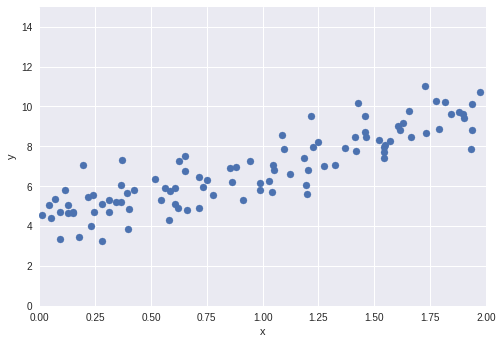

In [0]:
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 2)
plt.ylim(0, 15)
plt.show()

<b>Using Normal Equation</b>

In [0]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [0]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [0]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

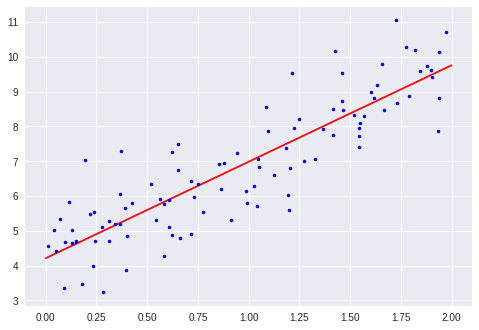

In [0]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, 'b.')
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [0]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

#Gradient Descent

In [0]:
lr = 0.1
n_iter = 1000
m = 100 # Used in SGD(two shells after)

theta = np.random.randn(2, 1)

for iter in range(n_iter):
  grad = 2/m*X_b.T.dot(X_b.dot(theta) - y)
  theta -= lr*grad

In [0]:
theta

array([[4.21509616],
       [2.77011339]])

#Stochastic Gradient Descent(SGD)

In [0]:
n_epoches = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t1 + t)

theta = np.random.randn(2, 1)

for epoch in range(n_epoches):
  for i in range(m):
    rand_idx = np.random.randint(m)
    xi = X_b[rand_idx:rand_idx+1]
    yi = y[rand_idx:rand_idx+1]
    grad = 2*xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i)
    
    theta -= eta*grad
   

In [0]:
theta

array([[4.18475289],
       [2.73036719]])

In [0]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.2287996]), array([2.79011436]))

#Polynomial Regression

with simple quadratic equation

In [0]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

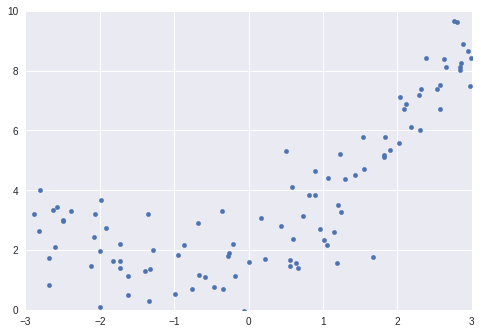

In [0]:
plt.scatter(X, y, s=20)
plt.axis([-3, 3, 0, 10])
plt.show()

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.94407494]), array([2.94407494, 8.66757727]))

In [0]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89554823]), array([[0.95707476, 0.49025797]]))

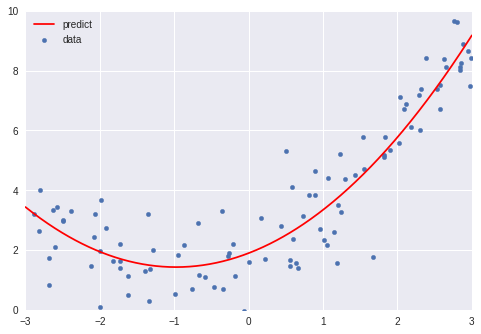

In [0]:
X_sample = np.linspace(-3, 3, 600)
plt.plot(X_sample, X_sample**2*lin_reg.coef_[0, 1] + X_sample*lin_reg.coef_[0, 0] + lin_reg.intercept_, c='red', label='predict')

plt.scatter(X, y, s=20, label='data')
plt.axis([-3, 3, 0, 10])

plt.legend()
plt.show()

In [0]:
poly_features.get_feature_names()

['x0', 'x0^2']

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Training set')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation set')
  plt.axis([0, 80, 0, 3.])
  plt.legend()


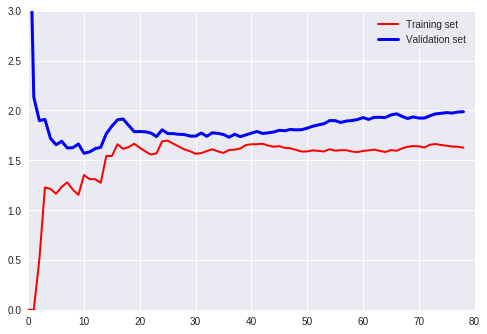

In [0]:
plot_learning_curves(lin_reg, X, y)

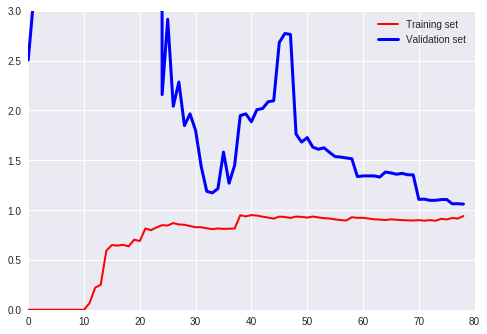

In [0]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

#Regulations of linear model

In [0]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.07720864]])

In [0]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.38918124])

In [0]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.04247738])

In [0]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.04191364])